# Разведочный анализ данных. Исследование и визуализация данных

## 1) Текстовое описание набора данных

В качестве набора данных мы будем использовать набор данных о пациентах с диабетом - https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

Данный набор данных состоит из одного файла. Предоставленные данные являются физиологическими данными и данными анализа крови пациентов. Для каждого пациента с диабетом были получены десять исходных переменных, возраст, пол, индекс массы тела, среднее артериальное давление и шесть измерений сыворотки крови, а также интересующий ответ, количественный показатель прогрессирования заболевания через год после исходного уровня. Данный файл содержит следующие колонки:

<ul>
    <li>AGE - возраст пациента</li>
    <li>SEX - пол пациента</li>
    <li>BMI - индекс массы тела</li>
    <li>BP  - среднее артериальное давление</li>
    <li>S1  - Т-клетки (тип лейкоцитов)</li>
    <li>S2  - липопротеины низкой плотности</li>
    <li>S3  - липопротеины высокой плотности</li>
    <li>S4  - тиреотропный гормон</li>
    <li>S5  - ламотриджин</li>
    <li>S6  - уровень сахара в крови</li>
    <li>Y   - количественный показатель прогрессирования заболевания</li>
</ul>


## Загрузка данных

Загрузим файлы датасета в помощью библиотеки Pandas.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")
data = pd.read_csv("lab1.csv", sep=";")

## 2) Основные характеристики датасета

In [2]:
# Первые 10 строк датасета
data.head(10)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,Female,32.1,101.0,157,93.2,38.0,4.00,4.8598,87,151
1,48,Male,21.6,87.0,183,103.2,70.0,3.00,3.8918,69,75
2,72,Female,30.5,93.0,156,93.6,41.0,4.00,4.6728,85,141
3,24,Male,25.3,84.0,198,131.4,40.0,5.00,4.8903,89,206
4,50,Male,23.0,101.0,192,125.4,52.0,4.00,4.2905,80,135
5,23,Male,22.6,89.0,139,64.8,61.0,2.00,4.1897,68,97
6,36,Female,22.0,90.0,160,99.6,50.0,3.00,3.9512,82,138
7,66,Female,26.2,114.0,255,185.0,56.0,4.55,4.2485,92,63
8,60,Female,32.1,83.0,179,119.4,42.0,4.00,4.4773,94,110
9,29,Male,30.0,85.0,180,93.4,43.0,4.00,5.3845,88,310


In [3]:
# Размер датасета (строки, колонки)
data.shape

(442, 11)

In [4]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 442


In [5]:
# Список колонок
data.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')

In [6]:
# Список колонок с типами данных
data.dtypes

AGE      int64
SEX     object
BMI    float64
BP     float64
S1       int64
S2     float64
S3     float64
S4     float64
S5     float64
S6       int64
Y        int64
dtype: object

In [7]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

AGE - 0
SEX - 0
BMI - 0
BP - 0
S1 - 0
S2 - 0
S3 - 0
S4 - 0
S5 - 0
S6 - 0
Y - 0


In [8]:
# Датасет
data

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,Female,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,Male,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,Female,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,Male,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,Male,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,Female,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,Female,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,Female,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,Male,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [9]:
# Основные статистические характеристки набора данных
data.describe()

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


In [10]:
# Определим уникальные значения для пола
data['SEX'].unique()

array(['Female', 'Male'], dtype=object)

# 3) Визуальное исследование датасета

## Диаграмма рассеяния

Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости.

<AxesSubplot:xlabel='AGE', ylabel='S6'>

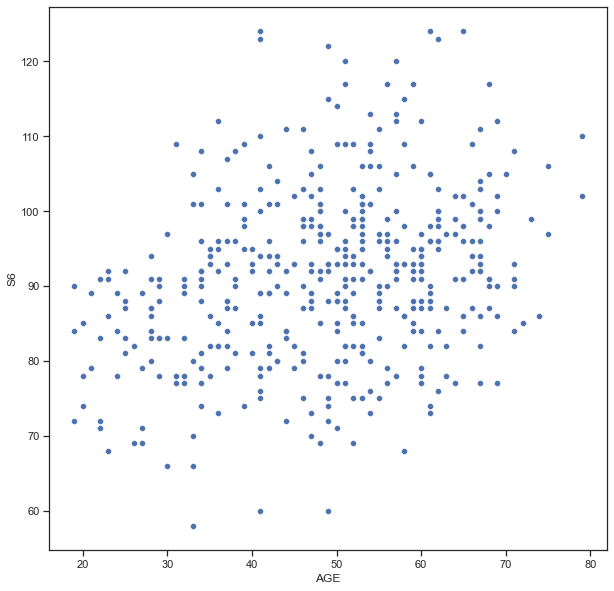

In [11]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='AGE', y='S6', data=data)

<AxesSubplot:xlabel='AGE', ylabel='S6'>

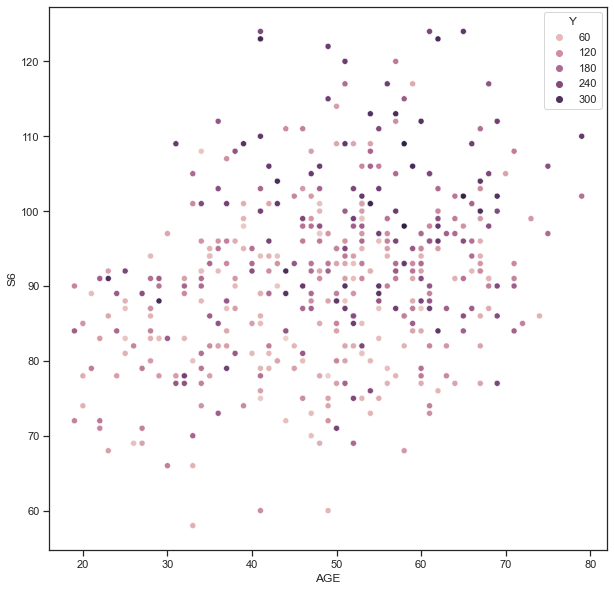

In [12]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='AGE', y='S6', data=data, hue='Y')

## Гистограмма


Позволяет оценить плотность вероятности распределения данных.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AGE', ylabel='Density'>

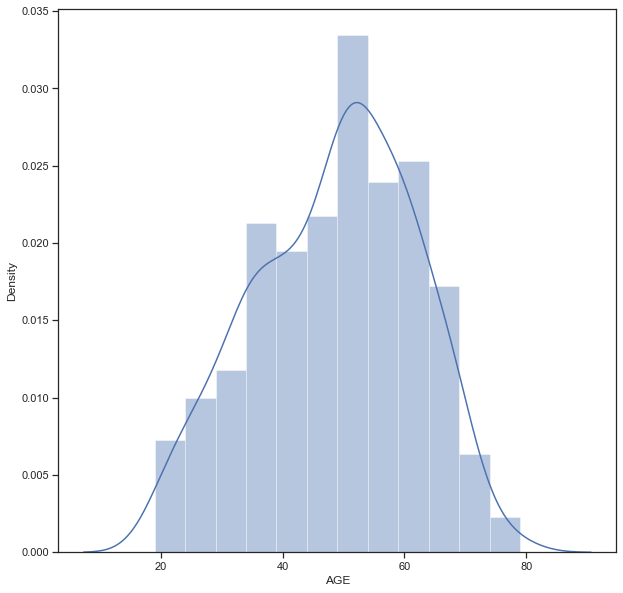

In [13]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(data['AGE'])

## Jointplot

Комбинация гистограмм и диаграмм рассеивания.

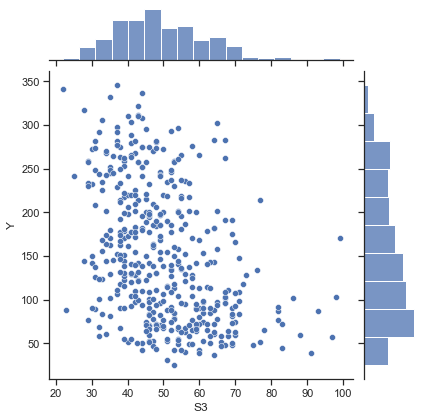

In [14]:
sns.jointplot(x='S3', y='Y', data=data)

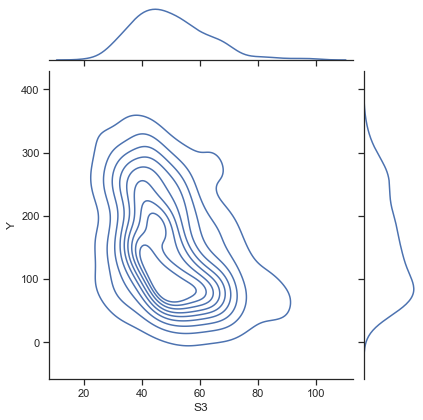

In [15]:
sns.jointplot(x='S3', y='Y', data=data, kind="kde")

## "Парные диаграммы"

Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

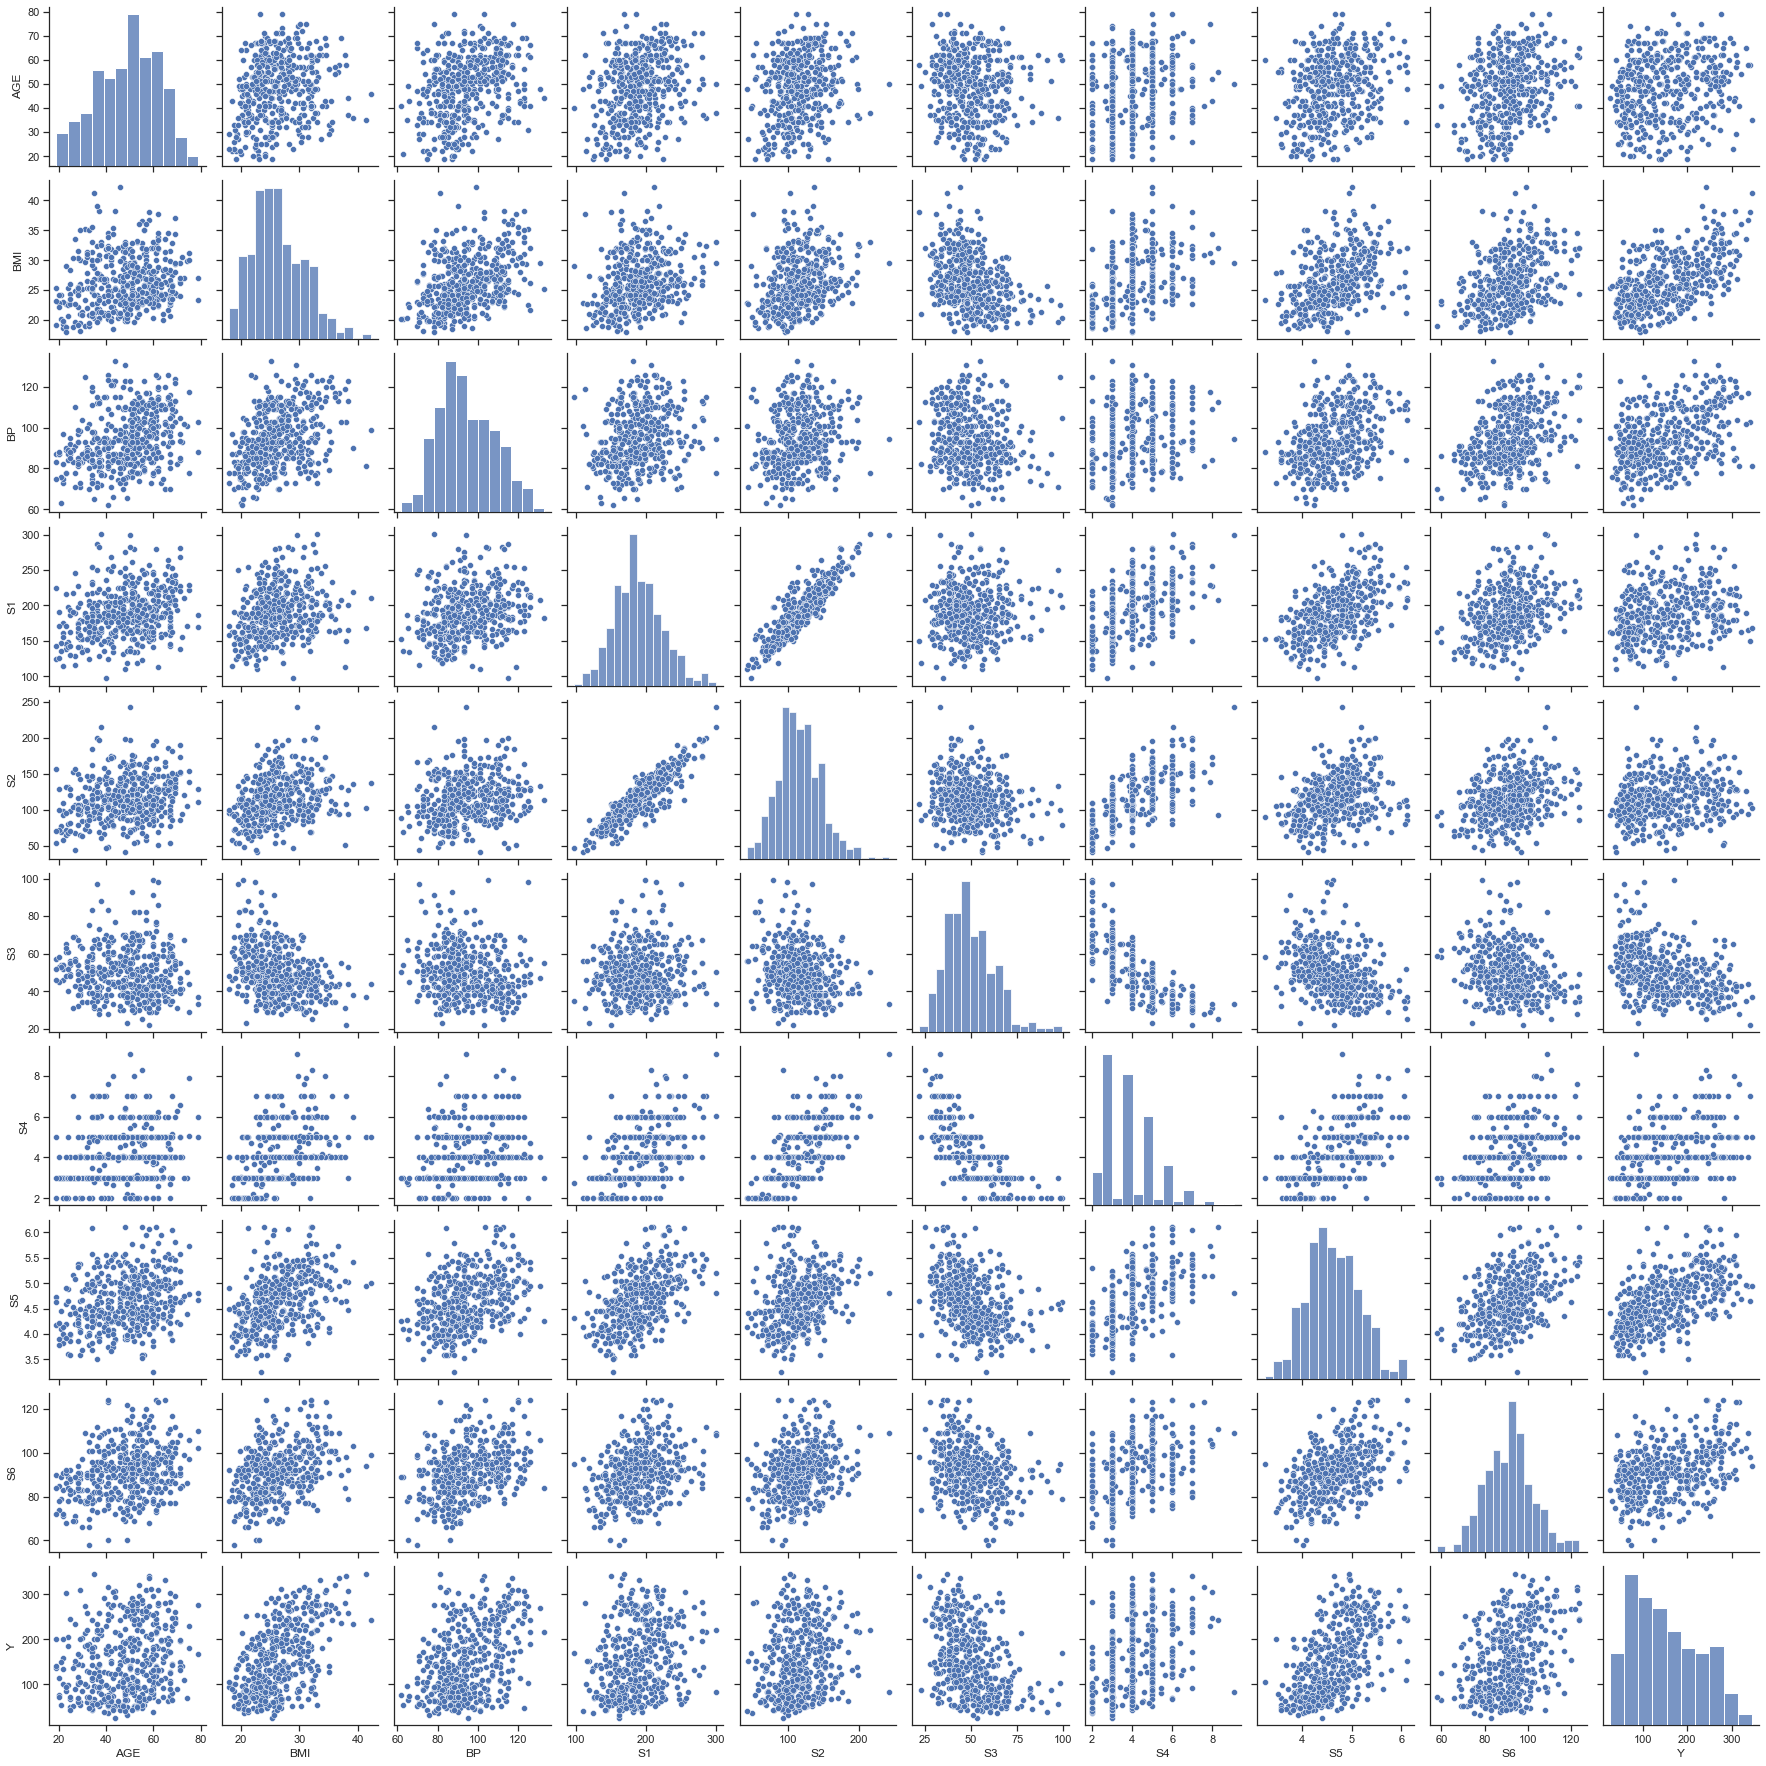

In [16]:
sns.pairplot(data)

## Violin plot

Отображает одномерное распределение вероятности, по краям отображаются распределения плотности.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Y', ylabel='Density'>

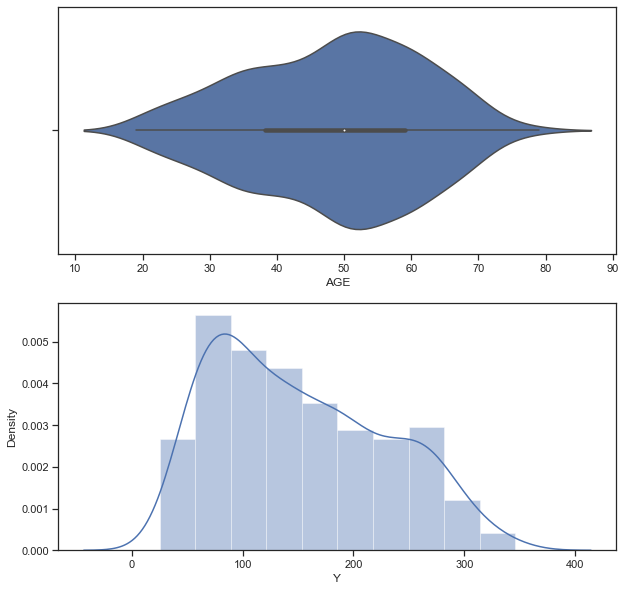

In [17]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['AGE'])
sns.distplot(data['Y'], ax=ax[1])

# 4) Информация о корреляции признаков

Построим матрицу корреляции с помощью разных методов

In [18]:
data.corr()

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
BMI,0.185085,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483
Y,0.187889,0.586450,0.441482,0.212022,0.174054,-0.394789,0.430453,0.565883,0.382483,1.000000


In [19]:
data.corr(method='pearson')

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
BMI,0.185085,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483
Y,0.187889,0.586450,0.441482,0.212022,0.174054,-0.394789,0.430453,0.565883,0.382483,1.000000


In [20]:
data.corr(method='kendall')

,AGE,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.136535,0.242111,0.182220,0.153612,-0.073846,0.160898,0.180544,0.201784,0.130709
BMI,0.136535,1.000000,0.281770,0.194171,0.198583,-0.249831,0.335625,0.344720,0.266373,0.391195
BP,0.242111,0.281770,1.000000,0.188067,0.140253,-0.131014,0.205948,0.268863,0.264566,0.289352
S1,0.182220,0.194171,0.188067,1.000000,0.717229,0.010695,0.393367,0.356268,0.227139,0.154016
S2,0.153612,0.198583,0.140253,0.717229,1.000000,-0.133332,0.503579,0.242250,0.194082,0.129665
S3,-0.073846,-0.249831,-0.131014,0.010695,-0.133332,1.000000,-0.638633,-0.311775,-0.200545,-0.278884
S4,0.160898,0.335625,0.205948,0.393367,0.503579,-0.638633,1.000000,0.485410,0.307397,0.324734
S5,0.180544,0.344720,0.268863,0.356268,0.242250,-0.311775,0.485410,1.000000,0.316235,0.408988
S6,0.201784,0.266373,0.264566,0.227139,0.194082,-0.200545,0.307397,0.316235,1.000000,0.239051
Y,0.130709,0.391195,0.289352,0.154016,0.129665,-0.278884,0.324734,0.408988,0.239051,1.000000


<AxesSubplot:>

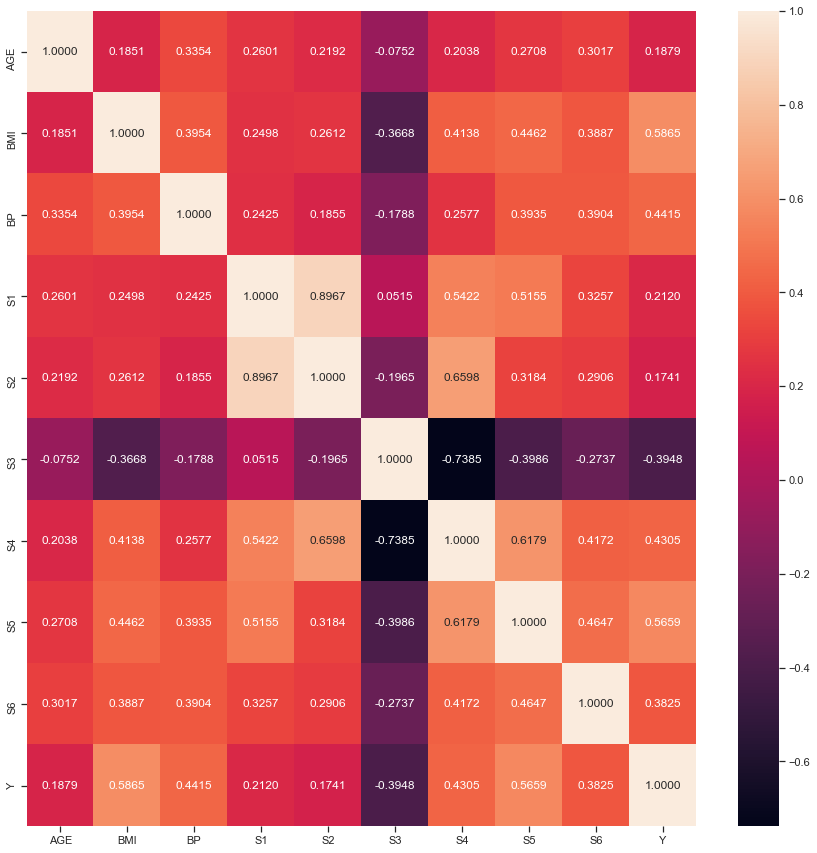

In [21]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(), annot=True, fmt='.4f')

<AxesSubplot:>

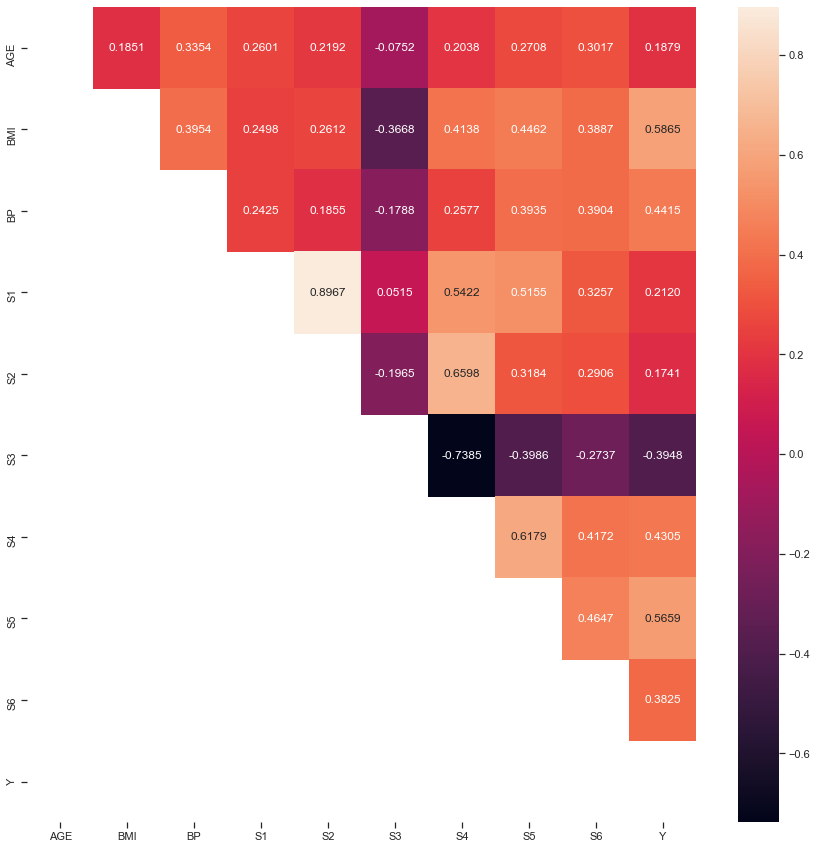

In [85]:
# Вывод значений в ячейках
fig, ax = plt.subplots(figsize=(15,15))
mask = np.zeros_like(data.corr(), dtype=bool)
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.4f')

## Выводы о коррелирующих признаках

На основе нашей корреляционной матрице, визуализированной с помощью тепловой карты, определим признаки которые коррелируют с нашим целевым признаком.


Отрицательный коэффициент корреляции показывает, что две переменные могут быть связаны таким образом, что при возрастании значений одной из них значения другой убывают. 

<ul>
    <li>Наиболее коррелируемым признаком является индекс массы тела BMI (0,5865)</li>
    <li>Вторым по коэффициенту корреляции является ламотриджин S5 (0,5659)</li>
    <li>Целевой признак хорошо коррелирует со следующими признаками: среднее артериальное давление BP (0,4415), липопротеины высокой плотности S3 (-0,3948), тиреотропный гормон S4 (0,4305), уровень сахара в крови S6 (0,3825)    
    <li>Из модели можно иключить следующие слабокоррерилиющие признаки: липопротеины низкой плотности S2 (0,1741), возраст пациента AGE (0,1879), Т-клетки (тип лейкоцитов) S1 (0,2120)</li>
    <li>Признак Т-клетки (тип лейкоцитов) S1 сильно коррелирует с признаком липопротеины низкой плотности S1 (0,8967), поэтому в модели можно оставить лишь один из них</li>
    <li>Также, признак липопротеины высокой плотности S3 сильно коррелирует с признаком тиреотропный гормон S4 (-0,7385), поэтому в модели можно оставить лишь один из них</li>   
</ul>